In [54]:
# Importing  Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics

In [55]:
# Reading the file
restaurant= pd.read_csv('Rest_rev.csv')

In [56]:
# Checking the Data (Restaurant) Information
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [57]:
# Perform a Descriptive Statistics
restaurant.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


In [58]:
# Checking for unique values in each column
R= restaurant.nunique(axis = 0)
print(f'Number of Unique Values in Every Column:\n{R}\n')

Number of Unique Values in Every Column:
Number_of_Customers            90
Menu_Price                   1000
Marketing_Spend              1000
Cuisine_Type                    4
Average_Customer_Spending    1000
Promotions                      2
Reviews                       100
Monthly_Revenue              1000
dtype: int64



In [59]:
# Checking for missing values in the dataset (NaN values)
check_nan = restaurant.isnull().sum()
print(f'Missing Values in the Dataset:\n{restaurant}\n')

Missing Values in the Dataset:
     Number_of_Customers  Menu_Price  Marketing_Spend Cuisine_Type  \
0                     61   43.117635        12.663793     Japanese   
1                     24   40.020077         4.577892      Italian   
2                     81   41.981485         4.652911     Japanese   
3                     70   43.005307         4.416053      Italian   
4                     30   17.456199         3.475052      Italian   
..                   ...         ...              ...          ...   
995                   73   41.307842        12.122931     Japanese   
996                   31   20.615496         5.822885      Mexican   
997                   69   17.110656         4.141898     Japanese   
998                   73   37.664722         3.046556     Japanese   
999                   81   34.722067        17.989104      Italian   

     Average_Customer_Spending  Promotions  Reviews  Monthly_Revenue  
0                    36.236133           0       45      

In [60]:
# Exploratory Analysis of the Restaurant Dataset
# Converting it to Cuisine_Type (Categorical) to Numerical feature

rep_cusi = {'Japanese': 0, 'American': 1, 'Mexican': 2, 'Italian':3}
restaurant['Cuisine_Type'] = restaurant['Cuisine_Type'].map(rep_cusi)
restaurant.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,0,36.236133,0,45,350.912040
1,24,40.020077,4.577892,3,17.952562,0,36,221.319091
2,81,41.981485,4.652911,0,22.600420,1,91,326.529763
3,70,43.005307,4.416053,3,18.984098,1,59,348.190573
4,30,17.456199,3.475052,3,12.766143,1,30,185.009121


In [67]:
# Data Normalisation of the dataset before splitting.
Scaler = MinMaxScaler()
c2s = ['Menu_Price', 'Marketing_Spend']
restaurant[c2s] = Scaler.fit_transform(restaurant[c2s])

# # Displaying the first few rows
# restaurant.head()

In [68]:
# Preparing Model Training/Testing Data
X = restaurant.drop('Monthly_Revenue', axis = 1)
X = pd.get_dummies(X, drop_first = True)
Y = restaurant['Monthly_Revenue']

# Splitting the dataset into the Training set and Test set
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3)

# # Displaying the first few rows of the dataset
# print(restaurant.head())

In [63]:
# Model Training and Testing
Regressor = LinearRegression()
Regressor.fit(X_Train, Y_Train)

# Predict on train and test sets
Y_Train_pred = Regressor.predict(X_Train)
Y_Test_pred =   Regressor.predict(X_Test)

In [70]:
# Model Evaluation on Train and Test Data
# Model Evaluation on Test Set
MSE_Test = mean_squared_error(Y_Test, Y_Test_pred)
RMSE_Test = np.sqrt(MSE_Test)
MAE_Test = mean_absolute_error(Y_Test, Y_Test_pred)

# Display MSE, RMSE and MAE for Test Set
print('Test Data:')
print('Mean Squared Error:', MSE_Test)
print('Root Mean Square Error:', RMSE_Test)
print('Mean Absolute Error:', MAE_Test)

# Calculating the MSE, RMSE and MAE for Train set
MSE_Train = mean_squared_error(Y_Train, Y_Train_pred)
RMSE_Train= np.sqrt(MSE_Train)
MAE_Train = mean_absolute_error(Y_Train, Y_Train_pred)

# Display MSE, RMSE and MAE for Train set
print('Train Data:')
print('Mean Squared Error:', MSE_Train)
print('Root Mean Square Error:', RMSE_Train)
print('Mean Absolute Error:', MAE_Train)

Test Data:
Mean Squared Error: 20873.904945167284
Root Mean Square Error: 144.47804312478516
Mean Absolute Error: 117.05396831323645
Train Data:
Mean Squared Error: 18412.484667176028
Root Mean Square Error: 135.6926109527561
Mean Absolute Error: 110.22401711111004


In [73]:
# Generate a table showing the predicted vs actual values for the test set
Table_AP = pd.DataFrame({'Actual': Y_Test, 'Predicted': Y_Test_pred})
print(Table_AP)

# # Linearity Check
# # Scatter Plot Visualisation
# plt.scatter(Y_Test, Y_Test_pred)
# plt.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], color = 'red')
# plt.xlabel('Actual Monthly Revenue')
# plt.ylabel('Predicted Revenue')
# plt.title("Actual Monthly Revenue vs Predicted")
# plt.show()

         Actual   Predicted
266  120.226950  301.842094
343  314.167628  248.522443
516  390.925598  175.061180
41   305.965599  289.101880
987  369.969104  193.136418
..          ...         ...
241  304.476143  320.465518
829  342.897837  255.798820
76   233.324769  325.551519
131  490.230727  340.902087
644  363.007780  214.235969

[300 rows x 2 columns]


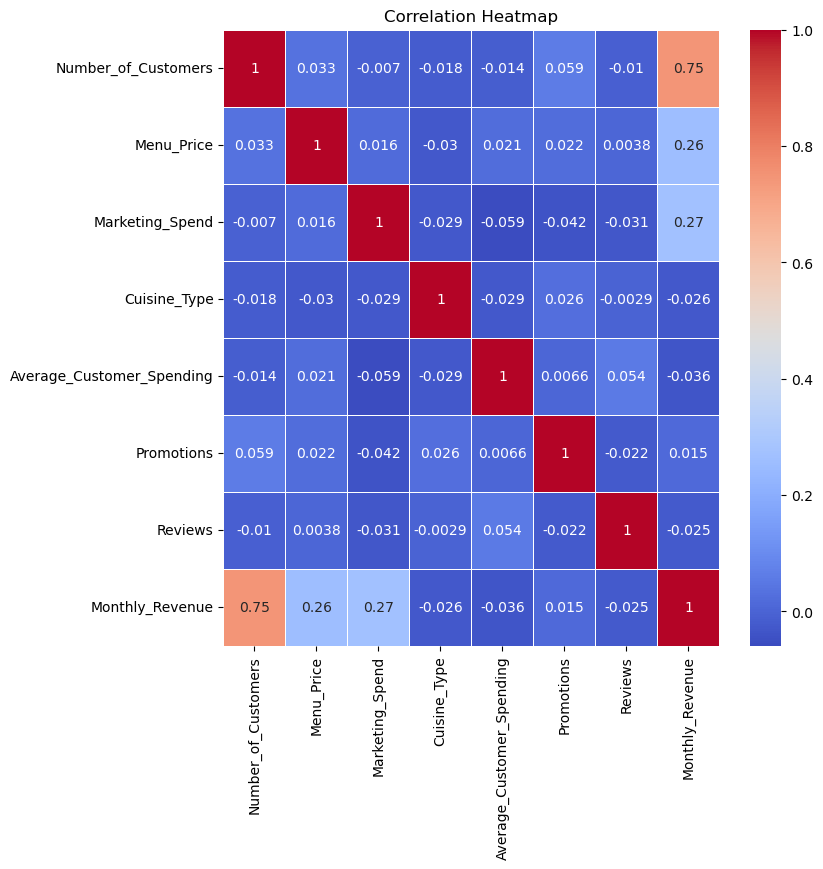

In [66]:
# Checking the correlation matrix of the dataset
correlation_matrix = restaurant.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()